In [171]:
import ConBacktester as cb
import SMABacktester as sma
import MeanRevBacktester as mb
import MLBacktester as ml
import DNNBacktester as dnn
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
df = pd.read_csv('AMZN.csv',parse_dates=['Date'],index_col=[0])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


Simple contrarian trading strategy

In [173]:
cb_backtest = cb.ConBacktester()

In [174]:
result = cb_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))

absolute performance of the strategy = 0.263112 -- out-/underperformance of strategy = -2.859014


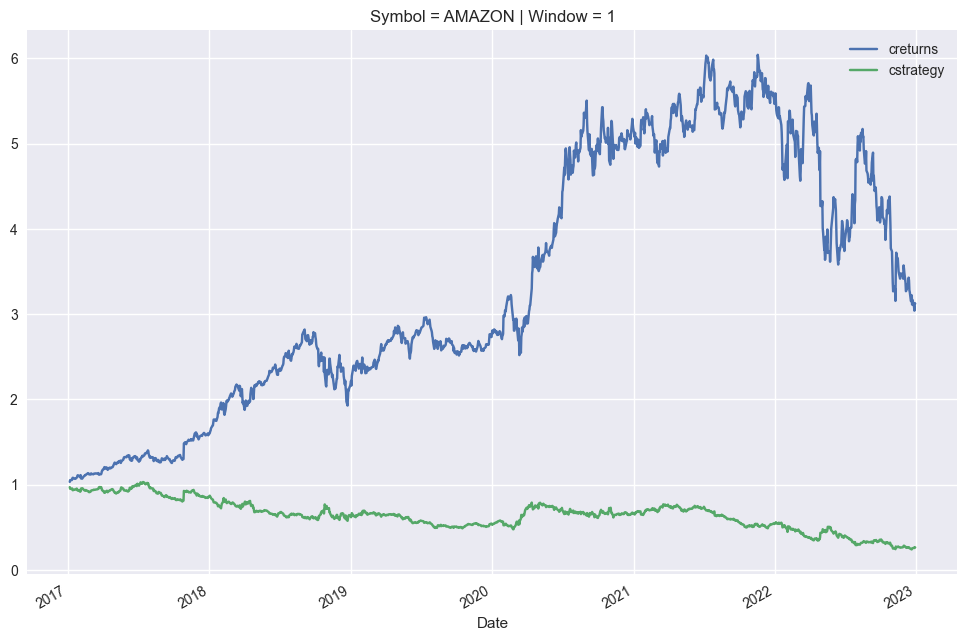

In [175]:
cb_backtest.plot_results()

absolute performance of the strategy = 1.636675 -- out-/underperformance of strategy = -1.31999


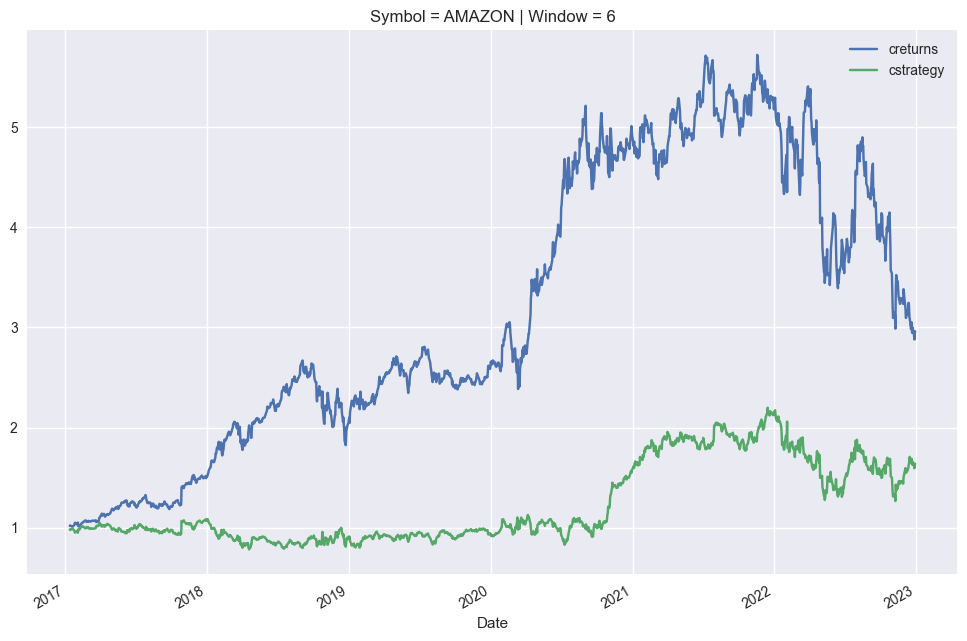

In [176]:
opt = cb_backtest.optimize_parameter(window_range=(1,20,1))
result = cb_backtest.test_strategy(window=opt[0])
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))
cb_backtest.plot_results()

SMA-based trading strategy

In [177]:
sma_backtest = sma.SMABacktester(SMA_S=5,SMA_L=20)

In [178]:
result = sma_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))

absolute performance of the strategy = 1.139239 -- out-/underperformance of strategy = -1.697391


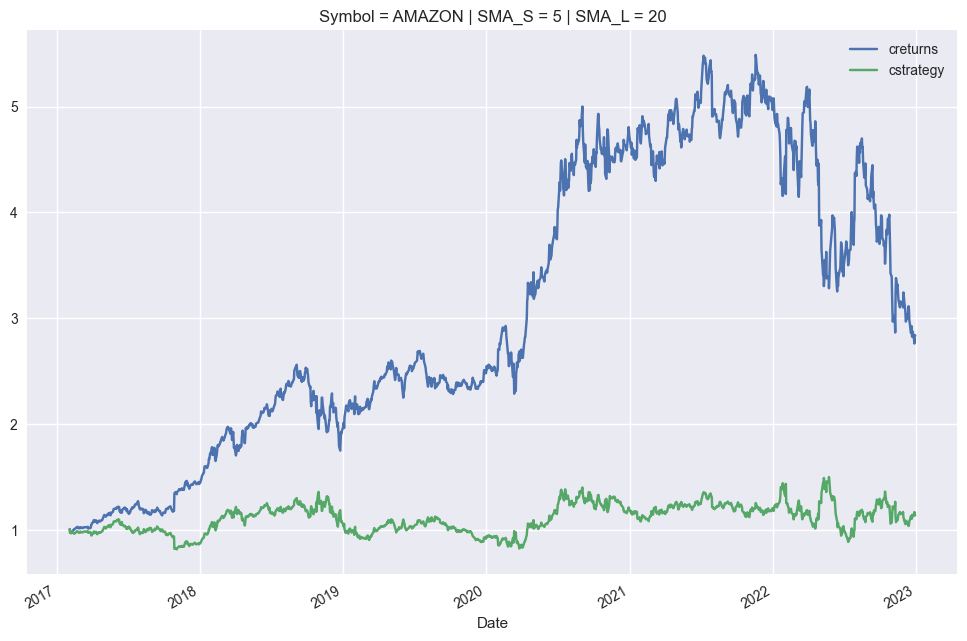

In [179]:
sma_backtest.plot_results()

absolute performance of the strategy = 4.577386 -- out-/underperformance of strategy = 2.155245


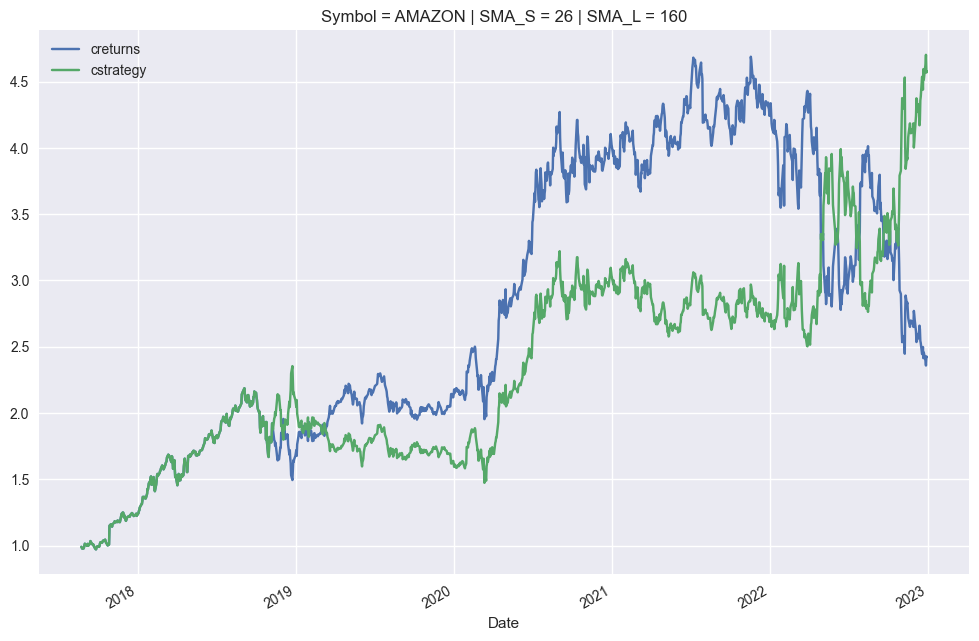

In [180]:
opt = sma_backtest.optimize_parameters(SMA_S_range=(20,40),SMA_L_range=(100,200))
sma_backtest = sma.SMABacktester(SMA_S=opt[0][0],SMA_L=opt[0][1])
result = sma_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))
sma_backtest.plot_results()

Bollinger Bands-based trading strategy

In [181]:
bb_backtest = mb.MeanRevBacktester(SMA=10,dev=2)

In [182]:
result = bb_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))

absolute performance of the strategy = 1.096305 -- out-/underperformance of strategy = -1.828739


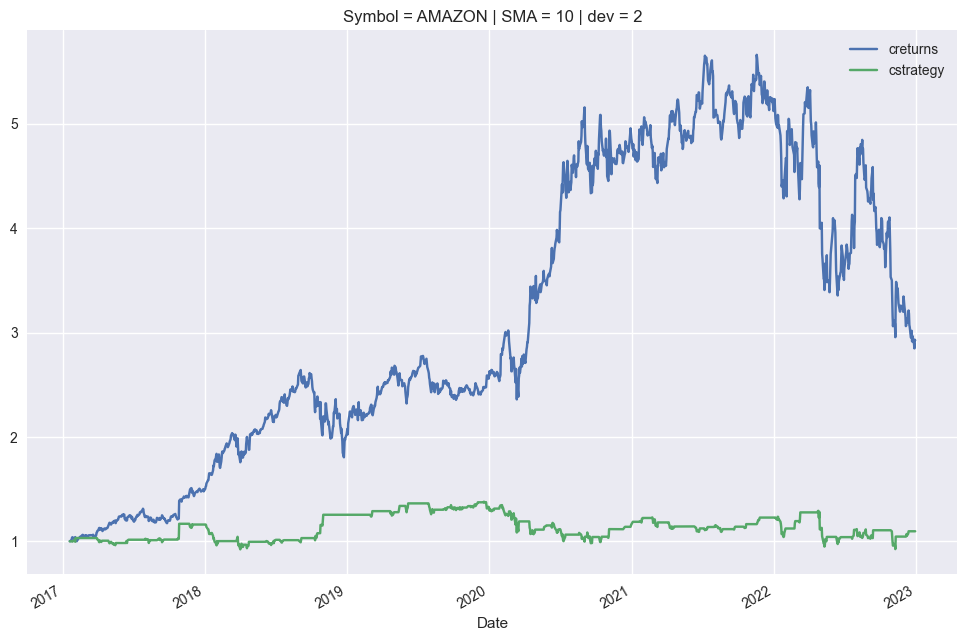

In [183]:
bb_backtest.plot_results()

absolute performance of the strategy = 1.101701 -- out-/underperformance of strategy = -1.770734


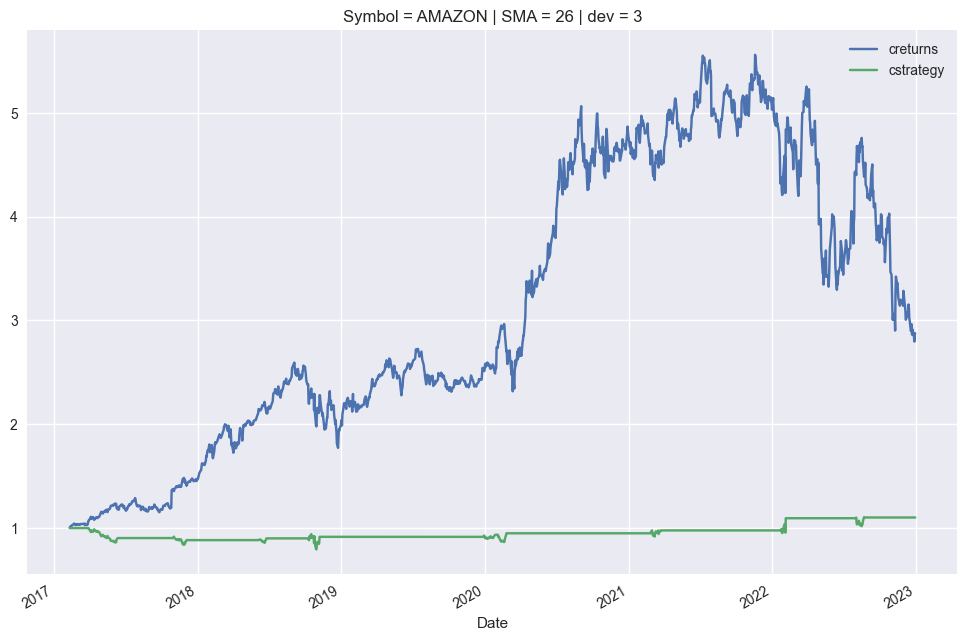

In [184]:
opt = bb_backtest.optimize_parameters(SMA_range=(25, 100, 1), dev_range=(1, 5, 1))
bb_backtest = mb.MeanRevBacktester(SMA=opt[0][0],dev=opt[0][1])
result = bb_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))
bb_backtest.plot_results()

Machine Learning-based trading strategy (Classification)

In [185]:
ml_backtest = ml.MLBacktester()

In [186]:
result = ml_backtest.train_test_strategy(split_ratio=0.8,lags=20)
print('absolute performance of the strategy(train data) = {} -- out-/underperformance of strategy(train data) = {}'.format(result[0],result[1]))
print("-"*120)
print('absolute performance of the strategy(test data) = {} -- out-/underperformance of strategy(test data) = {}'.format(result[2],result[3]))
print("-"*120)

absolute performance of the strategy(train data) = 5.454836 -- out-/underperformance of strategy(train data) = 0.201012
------------------------------------------------------------------------------------------------------------------------
absolute performance of the strategy(test data) = 0.524665 -- out-/underperformance of strategy(test data) = -0.015252
------------------------------------------------------------------------------------------------------------------------


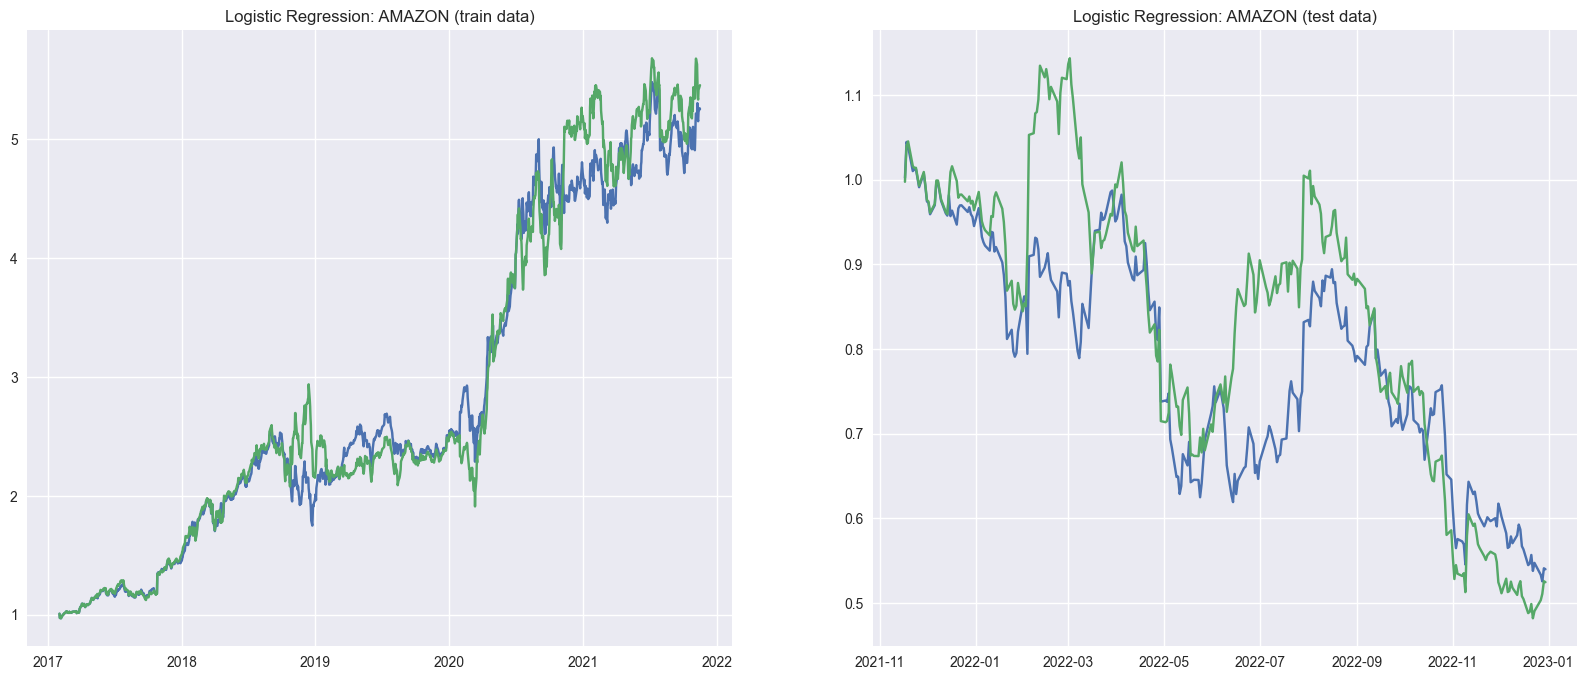

In [187]:
ml_backtest.plot_results()

DNN trading strategy (Classification)

In [188]:
dnn_backtest = dnn.DNNBacktester()
result = dnn_backtest.DNN_train_test_strategy(split_ratio=0.8,lags=5)
print('absolute performance of the strategy(train data) = {} -- out-/underperformance of strategy(train data) = {}'.format(result[0],result[1]))
print("-"*120)
print('absolute performance of the strategy(test data) = {} -- out-/underperformance of strategy(test data) = {}'.format(result[2],result[3]))
print("-"*120)

Epoch 1/200
19/19 - 2s - loss: 1.1425 - accuracy: 0.2759 - val_loss: 1.1270 - val_accuracy: 0.1987 - 2s/epoch - 86ms/step
Epoch 2/200
19/19 - 0s - loss: 1.1295 - accuracy: 0.2983 - val_loss: 1.1182 - val_accuracy: 0.2121 - 134ms/epoch - 7ms/step
Epoch 3/200
19/19 - 0s - loss: 1.1215 - accuracy: 0.3099 - val_loss: 1.1098 - val_accuracy: 0.2424 - 156ms/epoch - 8ms/step
Epoch 4/200
19/19 - 0s - loss: 1.1260 - accuracy: 0.3123 - val_loss: 1.1015 - val_accuracy: 0.2694 - 189ms/epoch - 10ms/step
Epoch 5/200
19/19 - 0s - loss: 1.1185 - accuracy: 0.3322 - val_loss: 1.0935 - val_accuracy: 0.3030 - 224ms/epoch - 12ms/step
Epoch 6/200
19/19 - 0s - loss: 1.1061 - accuracy: 0.3488 - val_loss: 1.0861 - val_accuracy: 0.3165 - 231ms/epoch - 12ms/step
Epoch 7/200
19/19 - 0s - loss: 1.1047 - accuracy: 0.3347 - val_loss: 1.0787 - val_accuracy: 0.3535 - 275ms/epoch - 14ms/step
Epoch 8/200
19/19 - 0s - loss: 1.1000 - accuracy: 0.3521 - val_loss: 1.0713 - val_accuracy: 0.3737 - 228ms/epoch - 12ms/step
Epoch

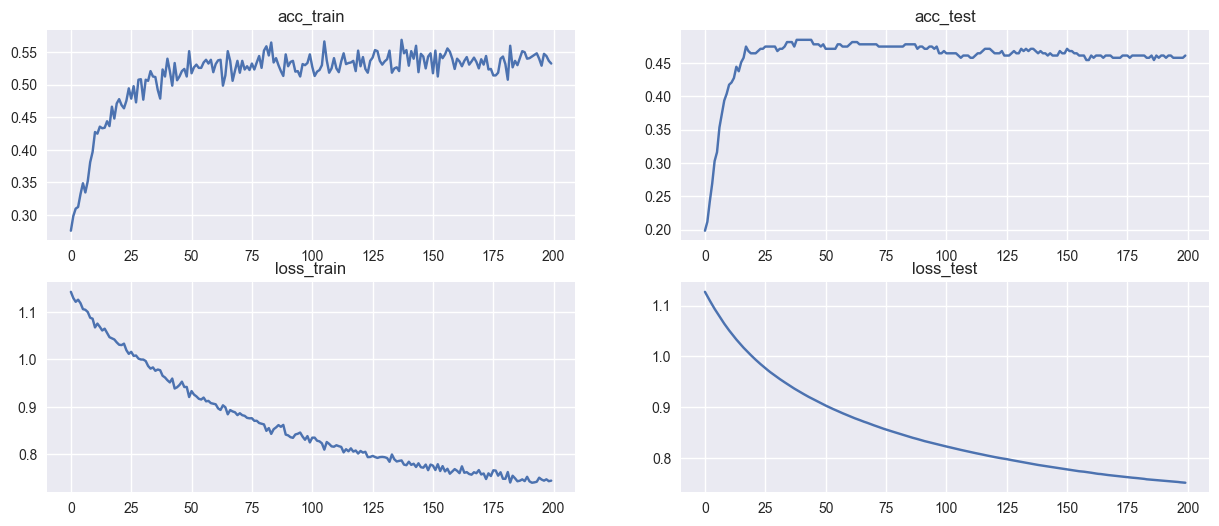

In [189]:
dnn_backtest.plot_loss_accuracy()


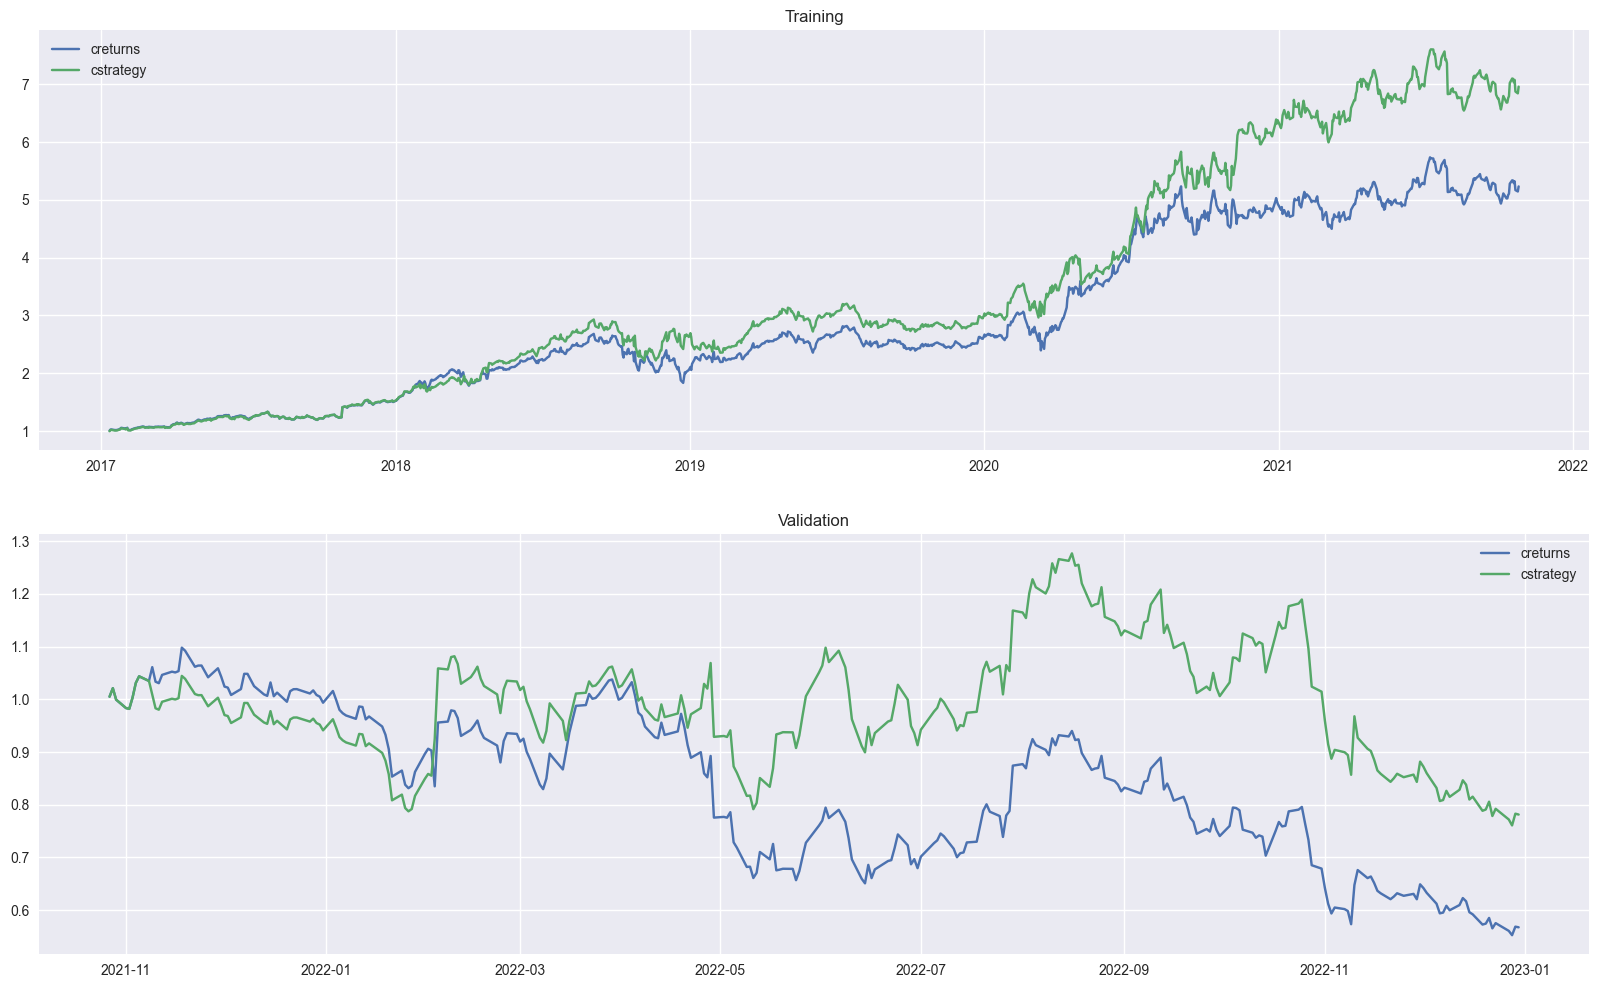

In [190]:
dnn_backtest.plot_results()